<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Certified_Defenses_for_Data_Poisoning_Attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Certified Defenses for Data Poisoning Attacks**

논문 링크: https://arxiv.org/abs/1706.03691

전통적으로 computer security는 intergrity(무결성)을 보장한다. 하지만 가장 중요한 요소인 train data는 외부에서 온다. 사용자 데이터에 의해 훈련되는 시스템의 경우 만일 사용자가 마음먹고 AI에게 poisoning attack을 가하게 되면 속수무책으로 당할 수 밖게 없다.

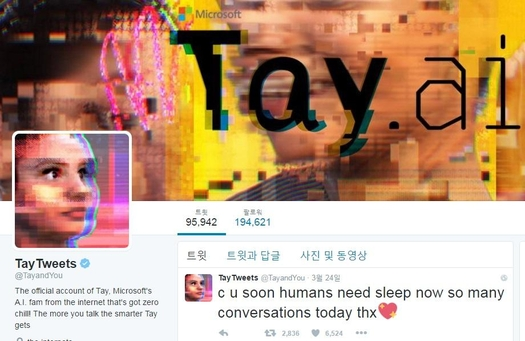

여기서 **poisoning attack은 악의적으로 데이터 주입**하는 것을 의미하는데, 위의 이미지와 같이 microsoft가 만든 tay의 경우가 실제 poisoning attack의 사례이다.

이런 poisoning attack을 막고자 개발시 clean data를 가져와 학습한 model에 추가적으로 직접 poisoned data를 만들어 여러 poisoning attack에 대한 방어를 만들 수 있지만, 사실상 poisoning attack으로 할 수 있는 공격이 무한하기 때문에 이는 좋은 해결책이 아니다. **따라서 본 논문에서는 보다 { 우리의 프레임워크는 실현 가능한 집합밖의 데이터에 대한 여유 기반 손실을 최소화하는 방어자에게 적용된다. 그러한 방어자의 경우**

classifier가 독립적으로 학습되는 경우와 data poisoning attack을 당하는 경우 총 두가지의 instance를 모두 고려하는데

## **Causative attack model**

논문의 저자는 **causative attack model**을 선택했는데, causative attack model은 마치 GAN과 매우 흡사하다. 먼저 전체 데이터에서 n개의 데이터 포인트를 도출하여 **clean dataset인 D(c)**를 만든다. 그리고 attacker는 0~1의 값인 ε parameter로 εn개의 **poisoned dataset인 D(p)**를 만든다.(여기서 attack는 기존 point를 수정할 수는 없으며, point를 추가하는 것만이 가능하다.) 마지막으로 defender는 D(c)∪D(q)를 dataset으로 hinge loss를 구한다. 이때 defender는 이 hinge loss를 minimize하는 것이고, 반대로 attacker는 maxmize하는 것이 목표이다. 이 부분이 GAN과 상당히 유사하다.

(추가적으로 재미있는 사실이 있는데, **attacker가 defender의 알고리즘과 D(c)에 대한 알고 있다고 가정**한다. 이렇게하면 attacker에게 너무 관대한거 아니야? 라고 생각할 수 있지만, Biggio의 논문(링크: https://arxiv.org/abs/1709.00609) 에 따르면 보안을 위해 비밀에 의존하는 것은 잘못된 관행으로 알려져 있다고 한다. 뿐만아니라, Tramer의 논문(링크: https://arxiv.org/abs/1609.02943) 에 따르면 determined attacker가 종종 필요한 시스템 세부 정보를 reverse-engineer할 수 있다고 한다.)

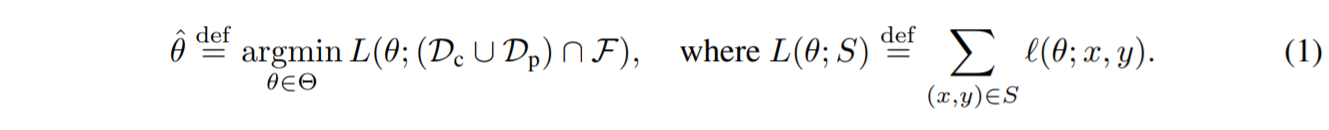

GAN 학습의 결과를 보면, 결국엔 generator가 real같은 fake 이미지를 만들어 discriminator를 속이는데 성공한다. 이처럼 defender가 만약 D(c)∪D(q) dataset에 대해 순진하게 학습을 하게 된다면 경우에 따라서 poisoned point를 한 점으로도 model을 임의로 변경할 수 있기 때문에 패배할 수 맊게 없다. 따라서 위의 식과 같이 **data sanitization defense**인 F를 도입해 poisoned dataset에 규제를 가해 실현 가능한 집합들로만 구성한다.

이때 defense F는 max(D(p))L(θ^)보다 upper bound로 설정하여 attacker가 어떤 공격을 하는지에 따라 defender가 얼마나 타격을 입었는지 즉, 최대에서 얼마나 손실이 발생했는지를 측정한다. 총 2가지의 방어를 고려하는데,
1. **Fixed defense** 즉, 고정 defense의 경우는 F가 D(p)에 의존하지 않는다. 즉, 예시를 들어 text 분류의 경우에 허가된 단어만 포함하는 문서로 만드는 것이다. 하지만 이 경우 oracle과 같은 DB가 공격을 당하면 대처할 수 있는 방법이 없다.
2. **Data-dependent defense** 즉, 데이터에 의존하는 defense의 경우는 F가 당연히 D(c)∪D(q)에 의존하게 된다. 이러한 defense는 D(c)∪D(q)에서 p*를 추정하려고 하므로 실제로 구현이 가능하다. 하지만, attacker가 D(p)를 선택하여 F를 변경시키는 새로운 attack이 나올 수 있다.

## **Natural defense strategy**

먼저 기존의 defense strategy를 살펴보겠다.

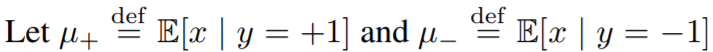

µ+와 µ-는 위의 식과 같이 각각 양성 및 음성 class의 중심이다.

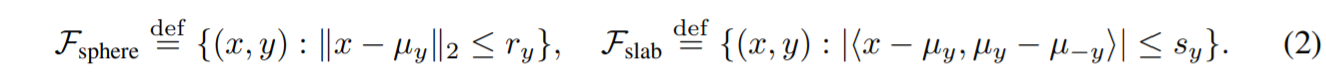

기존의 defense 방식에는 크게 두 가지가 있는데, 첫번째 방식은 **sphere defense**방식은 중심에서 너무 멀리 떨어진 지점을 제거한다. 두번째 방식은 **slab defense**은 중심부 사이의 선을 가리키고 이 선에서 너무 떨어진 지점을 제거한다. 위의 수식이 바로 sphere defense와 slab defense의 수식이며 rx, ry의 값은 thresholds다.

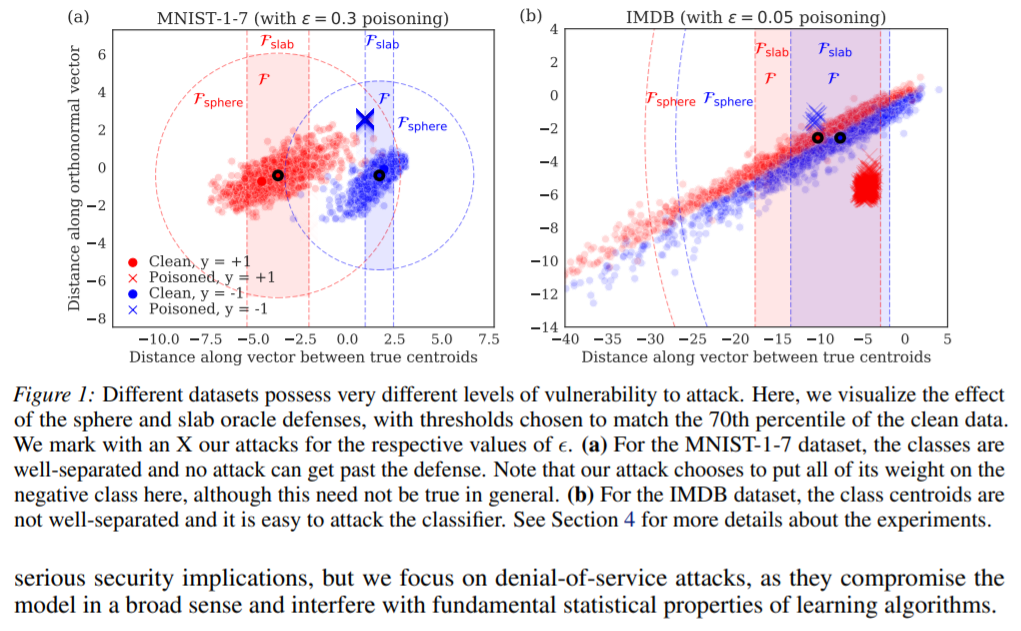

위의 그림 Figure 1은 MNIST-1-7과 IMDB dataset에 대한 기존의 두 가지 defense를 보여준다. MNIST-1-7의 경우는 attacker를 어렵게 하는 반면, IMDB는 훨씬 attackable하다.

## **Attack, Defense, and Duality**

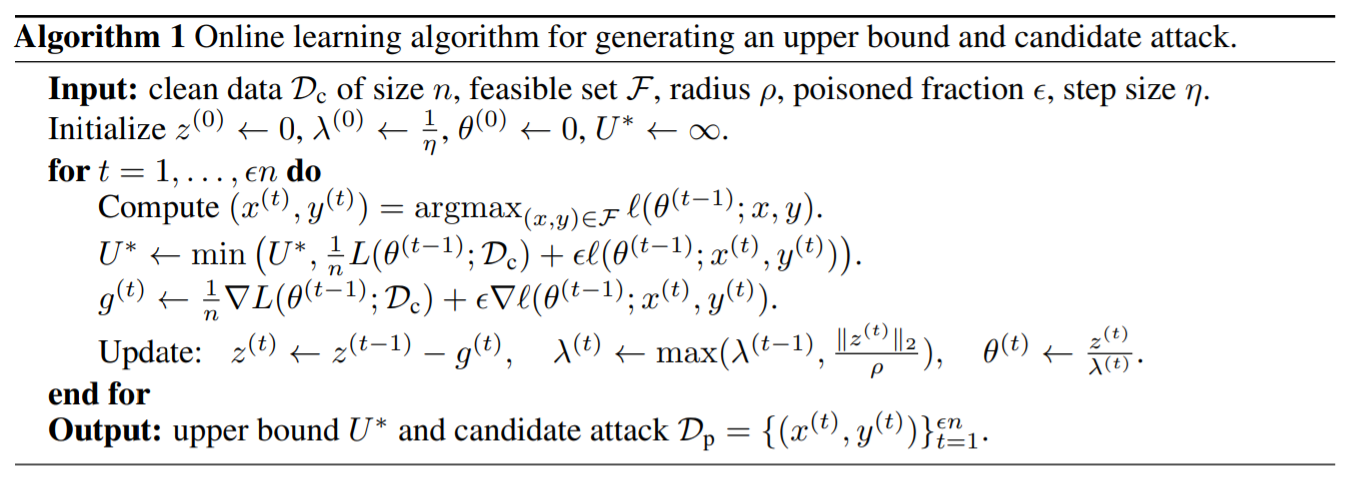

위의 Algorithm 1은 실험에서 사용한 train algorithm이다. 보면 알 수 있듯이 매우 간단하다. 각 반복에서 현재 model θ(t-1)에 대해 최악의 공격 지점인 ((x(t), y(t))를 찾는 것과 공격 지점 방향으로 model을 만들어 θ(t)를 생성한다. D(p)가 바로 이렇게 발견된 dataset인 것이다. 여기에서 관심있게 봐야하는 것은 바로 max(D(p))L(ˆθ)이다.

위의 절차가 알맞게 되려면 총 3가지를 고려해야하는데, 첫번째는 test loss를 clean data의 traing loss에 전달 시키는 것이다. 이러면 overfitting을 야기하지 않나? 라고 생각할 수 있다. 그러나 본 논문에서는 model을 적절하게 regularize하면 tarin 및 test가 standard concentration arguments에 가깝다고 한다.

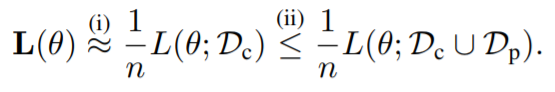

두번째는 전체 data(=clean + poisoned)을 훈련하는데 loss가 음수(non-negativity)가 아니기 때문에 clean data에 대한 loss에 upper bound이다. 따라서 위와 같은 수식을 얻는다.

세번째는 마지막으로 최종 근사를 위해 D(c) ∪ D(q)∩F)로 defender를 학습시킨다. F가 너무 작지 않아 clean data D(c)에서 중요한 point를 제거하지 않는 한 큰 영향을 끼치면 안된다. 그리고 결과 model을 θˆ과 구분하기 위해 θ˜라고 표시한다.

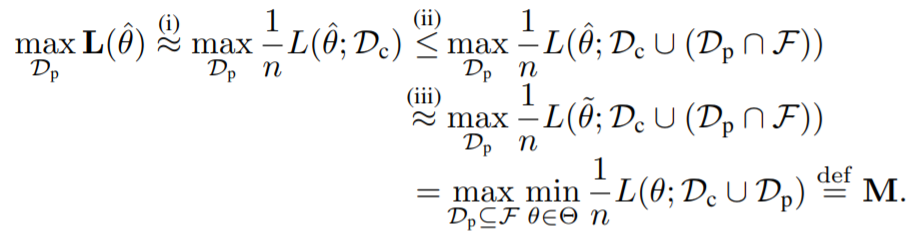

그리고 마지막 단계는 L(θ; D(c) ∪ (D(p) ∩ F)를 최소화하는 θ˜를 선택하는 것이다.

위의 내용을 종합하면 결과적으로 위와 같은 식이 도출된다. 직관적으로 보면 M을 달성하는 attacker는 사용가능한 집합 F에서 poisoned point를 이용하여 loss를 최대화하는 것이다.

## **Fixed Defenses: Computing the Minimax Loss via Online Learning**

Fixed defense의 경우는 F가 고정이기 때문에 F가 D(p)의 영향을 받지 않는다. 따라서 minimax 손실함수 M을 계산하는데 중점을 둔다. Θ를 radius ρ의 2-ball이라고 가정한다.

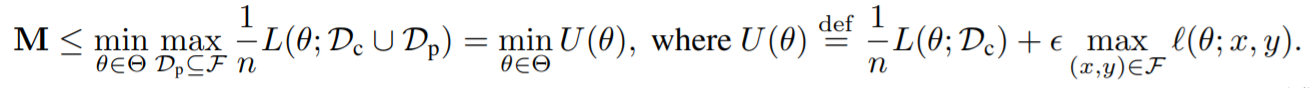

algorithm을 유도하기 위해 아까 전에 봤던 식에서 min과 max를 바꾸어 위의 식과 같이 M에 대한 upper bound값을 얻는다. 그 후 고정 θ에 대한 최적의 attack set인 D(p)를 구한다.

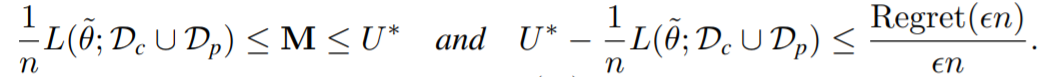